In [13]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

CPU times: user 23 µs, sys: 10 µs, total: 33 µs
Wall time: 34.8 µs


In [14]:
df=pd.read_csv("data.csv")
df

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,NOx-H15,NOx-H16,NOx-H17,NOx-H18,NOx-H19,NOx-H20,NOx-H21,NOx-H22,NOx-H23,NOx-H24
0,Ottawa Downtown,2022-01-01,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,7.9,8.4,5.7,6.2,6.0,5.9,4.9,3.7,4.4,3.5
1,Ottawa Downtown,2022-01-02,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,3.5,4.0,4.0,3.8,3.6,3.6,3.1,3.8,3.8,3.2
2,Ottawa Downtown,2022-01-03,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,9.6,7.3,5.8,13.3,17.9,21.1,7.4,71.9,7.6,24.8
3,Ottawa Downtown,2022-01-04,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,15.9,21.2,31.5,35.1,43.3,31.7,21.4,7.4,24.2,27.2
4,Ottawa Downtown,2022-01-05,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,18.8,18.5,21.6,27.8,31.9,12.0,12.3,12.4,8.4,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,2022-12-27,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,8.6,9.5,1.3,1.3,1.5,8.0,8.5,9.2,1.4,8.5
2186,Windsor Downtown,2022-12-28,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,11.0,1.8,14.2,15.1,9.4,9.4,9.3,1.2,8.1,7.7
2187,Windsor Downtown,2022-12-29,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,14.2,12.9,12.2,12.0,11.9,9.5,9.0,9.4,8.1,6.8
2188,Windsor Downtown,2022-12-30,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,11.6,9.5,9.4,1.8,15.5,13.0,9.9,13.5,2.3,17.0


# EDA

           SO2-H01      SO2-H02      SO2-H03      SO2-H04      SO2-H05  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean      0.951963     0.934475     0.912420     0.865023     0.864612   
std       3.574530     2.981239     3.480467     3.055394     2.711996   
min       0.100000     0.100000     0.100000     0.100000     0.100000   
25%       0.400000     0.400000     0.400000     0.400000     0.400000   
50%       0.400000     0.400000     0.400000     0.400000     0.400000   
75%       0.400000     0.400000     0.400000     0.400000     0.400000   
max      68.000000    61.000000    99.000000    62.000000    56.000000   

           SO2-H06      SO2-H07      SO2-H08      SO2-H09      SO2-H10  ...  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000  ...   
mean      0.902740     1.088813     1.289498     1.633288     2.061461  ...   
std       3.137182     3.278260     3.916435     4.775373     6.039322  ...   
min       0.10000

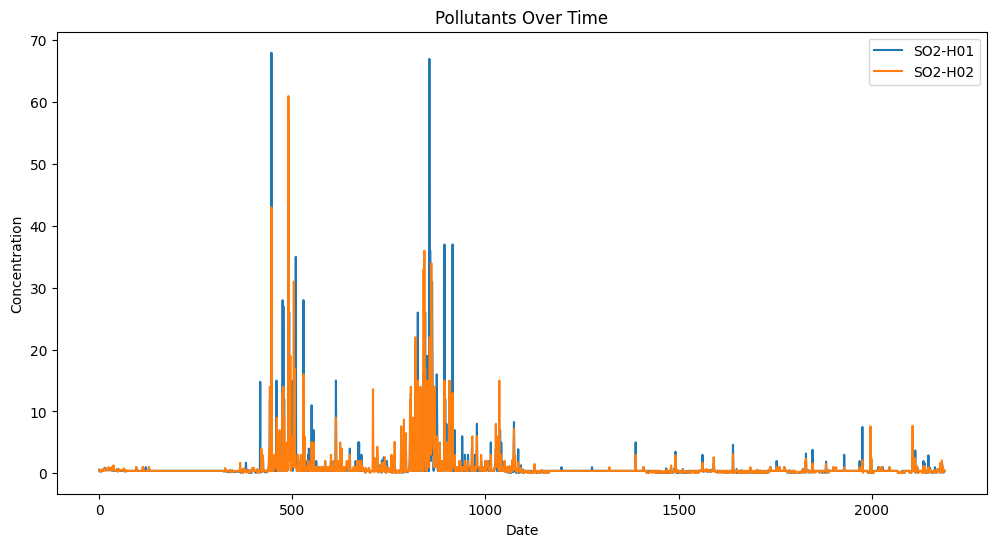

AttributeError: 'RangeIndex' object has no attribute 'month'

In [15]:


# Correcting the 'Date' column name and setting it as the index
#df['Date '] = pd.to_datetime(df['Date '])
#df.set_index('Date ', inplace=True)

# Display Summary Statistics for each pollutant
print(df.describe())

# Time Series Plot for a select few pollutants
# Replace 'SO2-H01', 'SO2-H02', etc., with the pollutants you're interested in
plt.figure(figsize=(12, 6))
plt.plot(df['SO2-H01'], label='SO2-H01')
plt.plot(df['SO2-H02'], label='SO2-H02')
plt.title('Pollutants Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

# Seasonality Analysis - Monthly for a sp ecific pollutant
df['Month'] = df.index.month
monthly_pollutant = df.groupby('Month')['SO2-H01'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_pollutant.index, y=monthly_pollutant.values)
plt.title('Average Monthly Concentration of SO2-H01')
plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.show()

# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Calculating Hourly Sub index of each pollutant

In [ ]:

# Define the function to calculate PM2.5 sub-index
def get_PM25_subindex(pi):
    if pi <= 30:
        return pi * 50 / 30
    elif pi <= 60:
        return 50 + (pi - 30) * 50 / 30
    elif pi <= 90:
        return 100 + (pi - 60) * 100 / 30
    elif pi <= 120:
        return 200 + (pi - 90) * 100 / 30
    elif pi <= 250:
        return 300 + (pi - 120) * 100 / 130
    elif pi > 250:
        return 400 + (pi - 250) * 100 / 130
    else:
        return pi

# Apply the function to each hourly PM2.5 column
for hour in range(1, 25):  # For hours 1 through 24
    pm25_col = f'PM2.5-H{hour:02d}'  # PM2.5 column for the hour
    pmi_col = f'PMI-H{hour:02d}'    # New column for the PMI of the hour
    df[pmi_col] = df[pm25_col].apply(get_PM25_subindex)

df


TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
## O3 Sub-Index calculation
def get_O3_subindex(oi):
    if oi <= 50:
        return oi * 50 / 50
    elif oi <= 100:
        return 50 + (oi - 50) * 50 / 50
    elif oi <= 168:
        return 100 + (oi - 100) * 100 / 68
    elif oi <= 208:
        return 200 + (oi - 168) * 100 /40
    elif oi <= 748:
        return 300 + (oi - 208) * 100 / 539
    elif oi > 748:
        return 400 + (oi - 400) * 100 / 539
    else:
        return oi

# Apply the function to each hourly O3 column
for hour in range(1, 25):
    o3_col = f'O3-H{hour:02d}'
    o3i_col = f'O3I-H{hour:02d}'  # Updated column name for O3 sub-index
    df[o3i_col] = df[o3_col].apply(get_O3_subindex)

df

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
def get_NO2_subindex(ni):
    if ni <= 40:
        return ni * 50 / 40
    elif ni <= 80:
        return 50 + (ni - 40) * 50 / 40
    elif ni <= 180:
        return 100 + (ni - 80) * 100 / 100
    elif ni <= 280:
        return 200 + (ni - 180) * 100 / 100
    elif ni <= 400:
        return 300 + (ni - 280) * 100 / 120
    elif ni > 400:
        return 400 + (ni - 400) * 100 / 120
    else:
        return ni# Apply the function to each hourly NO2 column

for hour in range(1, 25):
    no2_col = f'NO2-H{hour:02d}'
    ni_col = f'NI-H{hour:02d}'  # Updated column name for NO2 sub-index
    df[ni_col] = df[no2_col].apply(get_NO2_subindex)
df

,City,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,SO2-H09,...,NI-H15,NI-H16,NI-H17,NI-H18,NI-H19,NI-H20,NI-H21,NI-H22,NI-H23,NI-H24
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,Ottawa Downtown,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,0.5,...,7.625,7.875,5.750,5.875,5.500,5.250,4.750,3.625,4.000,3.500
2022-01-02,Ottawa Downtown,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,3.125,3.750,3.750,3.625,3.500,3.500,3.000,3.625,3.625,3.125
2022-01-03,Ottawa Downtown,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,...,8.625,7.625,1.250,15.750,20.750,2.500,44.625,8.625,33.875,27.875
2022-01-04,Ottawa Downtown,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,0.5,...,17.000,22.875,31.750,34.625,39.500,33.625,24.250,23.125,27.250,27.875
2022-01-05,Ottawa Downtown,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,0.4,...,18.250,20.000,24.250,30.625,31.000,7.750,13.875,13.875,9.375,10.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,Windsor Downtown,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,0.4,...,8.125,9.750,11.125,11.375,11.625,8.750,9.500,10.375,11.500,9.375
2022-12-28,Windsor Downtown,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,0.1,...,10.875,11.125,15.875,17.250,10.875,10.750,10.625,11.875,9.375,8.875
2022-12-29,Windsor Downtown,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,0.3,...,15.000,14.625,14.000,13.875,13.875,10.875,10.375,10.625,9.375,7.875


In [ ]:
def get_SO2_subindex(si):
    if si <= 40:
        return si * 50 / 40
    elif si <= 80:
        return 50 + (si - 40) * 50 / 40
    elif si <= 380:
        return 100 + (si - 80) * 100 / 300
    elif si <= 800:
        return 200 + (si - 380) * 100 / 420
    elif si <= 1600:
        return 300 + (si - 800) * 100 / 800
    elif si > 1600:
        return 400 + (si - 1600) * 100 / 800
    else:
        return si
    # Apply the function to each hourly SO2 column
for hour in range(1, 25):
    so2_col = f'SO2-H{hour:02d}'
    si_col = f'SI-H{hour:02d}'  # Updated column name for SO2 sub-index
    df[si_col] = df[so2_col].apply(get_SO2_subindex)
df

,City,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,SO2-H09,...,SI-H15,SI-H16,SI-H17,SI-H18,SI-H19,SI-H20,SI-H21,SI-H22,SI-H23,SI-H24
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,Ottawa Downtown,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,0.5,...,0.500,0.500,0.500,0.500,0.500,0.375,0.375,0.375,0.375,0.375
2022-01-02,Ottawa Downtown,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375
2022-01-03,Ottawa Downtown,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,...,0.500,0.500,0.500,0.500,0.625,0.500,0.625,0.750,0.625,0.500
2022-01-04,Ottawa Downtown,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,0.5,...,0.625,0.625,0.625,0.625,0.625,0.625,0.500,0.500,0.500,0.625
2022-01-05,Ottawa Downtown,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,0.4,...,0.875,0.875,1.125,1.000,0.750,0.500,0.500,0.500,0.500,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,Windsor Downtown,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,0.4,...,0.625,0.375,0.250,0.125,0.125,0.125,0.125,0.125,0.125,0.125
2022-12-28,Windsor Downtown,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,0.1,...,1.125,1.000,0.500,0.250,0.250,0.500,0.500,0.500,0.625,0.625
2022-12-29,Windsor Downtown,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,0.3,...,0.500,0.500,0.500,0.375,0.375,0.250,0.250,0.250,0.250,0.250


In [ ]:
# Apply the function to each hourly CO column
def get_CO_subindex(ci):
    if ci <= 1:
        return ci * 50 / 1
    elif ci <= 2:
        return 50 + (ci - 1) * 50 / 1
    elif ci <= 10:
        return 100 + (ci - 2) * 100 / 8
    elif ci <= 17:
        return 200 + (ci - 10) * 100 / 7
    elif ci <= 34:
        return 300 + (ci - 17) * 100 / 17
    elif ci > 34:
        return 400 + (ci - 34) * 100 / 17
    else:
        return 0
for hour in range(1, 25):
    co_col = f'CO-H{hour:02d}'
    ci_col = f'CI-H{hour:02d}'  # Updated column name for CO sub-index
    df[ci_col] = df[co_col].apply(get_CO_subindex)
df

C:\Users\vihar\AppData\Local\Temp\ipykernel_24144\2116071872.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ci_col] = df[co_col].apply(get_CO_subindex)
C:\Users\vihar\AppData\Local\Temp\ipykernel_24144\2116071872.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ci_col] = df[co_col].apply(get_CO_subindex)
C:\Users\vihar\AppData\Local\Temp\ipykernel_24144\2116071872.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

,City,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,SO2-H09,...,CI-H15,CI-H16,CI-H17,CI-H18,CI-H19,CI-H20,CI-H21,CI-H22,CI-H23,CI-H24
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,Ottawa Downtown,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,0.5,...,9.5,10.0,10.0,10.0,10.0,10.5,10.5,10.5,11.0,10.5
2022-01-02,Ottawa Downtown,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,9.5,10.0,10.0,10.0,10.0,10.5,10.5,10.5,11.0,10.5
2022-01-03,Ottawa Downtown,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,...,9.5,10.0,10.0,10.0,10.0,10.5,10.5,10.5,11.0,10.5
2022-01-04,Ottawa Downtown,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,0.5,...,9.5,10.0,10.0,10.0,10.0,10.5,10.5,10.5,11.0,10.5
2022-01-05,Ottawa Downtown,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,0.4,...,9.5,10.0,10.0,10.0,10.0,10.5,10.5,10.5,11.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,Windsor Downtown,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,0.4,...,11.5,12.5,12.0,12.5,12.5,11.5,11.5,11.5,8.0,9.0
2022-12-28,Windsor Downtown,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,0.1,...,10.0,8.5,8.5,6.5,5.0,45.0,5.0,6.5,10.5,10.5
2022-12-29,Windsor Downtown,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,0.3,...,13.5,12.5,12.5,12.0,13.0,12.5,12.0,12.0,10.0,8.5


# Hourly AQI Generation

In [ ]:
# Function to calculate AQI from the sub-indices
def calculate_hourly_aqi(row):
    # Extracting the sub-indices for each pollutant for a specific hour
    hourly_aqi_values = [row[f'CI-H{hour:02d}'], row[f'SI-H{hour:02d}'], 
                         row[f'NI-H{hour:02d}'], row[f'O3I-H{hour:02d}'], 
                         row[f'PMI-H{hour:02d}']]
    # The AQI is the maximum of these sub-indices
    return max(hourly_aqi_values)

# Calculate AQI for each hour and store in new columns
for hour in range(1, 25):
    aqi_col = f'AQI-H{hour:02d}'
    df[aqi_col] = df.apply(calculate_hourly_aqi, axis=1)

# Now 'df' contains the AQI for each hour
df

,City,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,SO2-H09,...,AQI-H15,AQI-H16,AQI-H17,AQI-H18,AQI-H19,AQI-H20,AQI-H21,AQI-H22,AQI-H23,AQI-H24
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,Ottawa Downtown,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,0.5,...,21.666667,18.333333,10.00,23.000000,26.000000,28.000000,10.500000,32.000000,32.000000,10.500000
2022-01-02,Ottawa Downtown,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,33.000000,33.000000,33.00,34.000000,33.000000,32.000000,32.000000,31.000000,31.000000,31.000000
2022-01-03,Ottawa Downtown,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,...,32.000000,31.000000,27.00,26.000000,21.000000,18.000000,44.625000,21.666667,33.875000,27.875000
2022-01-04,Ottawa Downtown,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,0.5,...,24.000000,22.875000,31.75,34.625000,39.500000,33.625000,24.250000,23.125000,27.250000,27.875000
2022-01-05,Ottawa Downtown,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,0.4,...,23.333333,26.666667,24.25,36.666667,31.000000,26.000000,24.000000,24.000000,25.000000,21.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,Windsor Downtown,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,0.4,...,31.000000,28.000000,25.00,26.666667,28.333333,24.000000,24.000000,22.000000,21.666667,24.000000
2022-12-28,Windsor Downtown,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,0.1,...,15.000000,15.000000,25.00,24.000000,32.000000,45.000000,35.000000,32.000000,34.000000,33.000000
2022-12-29,Windsor Downtown,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,0.3,...,25.000000,26.000000,27.00,25.000000,24.000000,24.000000,24.000000,25.000000,26.000000,25.000000


# Overall AQI

In [ ]:
# Calculate the average of the hourly AQI values
hourly_aqi_columns = [f'AQI-H{hour:02d}' for hour in range(1, 25)]
df['Overall_AQI_Avg'] = df[hourly_aqi_columns].mean(axis=1)
df


,City,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,SO2-H09,...,AQI-H16,AQI-H17,AQI-H18,AQI-H19,AQI-H20,AQI-H21,AQI-H22,AQI-H23,AQI-H24,Overall_AQI_Avg
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,Ottawa Downtown,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,0.5,...,18.333333,10.00,23.000000,26.000000,28.000000,10.500000,32.000000,32.000000,10.500000,34.071181
2022-01-02,Ottawa Downtown,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,33.000000,33.00,34.000000,33.000000,32.000000,32.000000,31.000000,31.000000,31.000000,28.312500
2022-01-03,Ottawa Downtown,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,...,31.000000,27.00,26.000000,21.000000,18.000000,44.625000,21.666667,33.875000,27.875000,27.001736
2022-01-04,Ottawa Downtown,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,0.5,...,22.875000,31.75,34.625000,39.500000,33.625000,24.250000,23.125000,27.250000,27.875000,25.494792
2022-01-05,Ottawa Downtown,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,0.4,...,26.666667,24.25,36.666667,31.000000,26.000000,24.000000,24.000000,25.000000,21.666667,24.791667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,Windsor Downtown,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,0.4,...,28.000000,25.00,26.666667,28.333333,24.000000,24.000000,22.000000,21.666667,24.000000,23.788194
2022-12-28,Windsor Downtown,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,0.1,...,15.000000,25.00,24.000000,32.000000,45.000000,35.000000,32.000000,34.000000,33.000000,27.166667
2022-12-29,Windsor Downtown,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,0.3,...,26.000000,27.00,25.000000,24.000000,24.000000,24.000000,25.000000,26.000000,25.000000,25.263889


# Building Long-Short Term Memory

In [ ]:
values = df['Overall_AQI_Avg'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Function to create a dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1  # Number of previous time steps to consider
X, Y = create_dataset(scaled_values, look_back)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], look_back, 1))
X_test = X_test.reshape((X_test.shape[0], look_back, 1))
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Optionally, print a few rows of the data
print("First few rows of X_train:")
print(X_train[:5])
print("First few rows of y_train:")
print(y_train[:5])

Shape of X_train: (1750, 1, 1)
Shape of y_train: (1750,)
Shape of X_test: (438, 1, 1)
Shape of y_test: (438,)
First few rows of X_train:
[[[0.41203454]]

 [[0.34565569]]

 [[0.47861576]]

 [[0.11980572]]

 [[0.45635456]]]
First few rows of y_train:
[0.34592553 0.48488937 0.2582299  0.14490016 0.48954398]


In [ ]:


# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))  # 50 units in the LSTM layer
model.add(Dense(1))  # Output layer with one neuron for regression
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100

44/44 [==============================] - 2s 9ms/step - loss: 0.1076 - val_loss: 0.0882
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0614 - val_loss: 0.0474
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0299 - val_loss: 0.0227
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0163 - val_loss: 0.0157
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.0149
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0140 - val_loss: 0.0148
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 0.0147
Epoch 8/100
44/44 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.0147
Epoch 9/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0137 - val_loss: 0.0146
Epoch 10/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.0145
Epoch 11

In [ ]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

# Making predictions
predictions = model.predict(X_test)

# Optionally, compare predictions with actual values or calculate other metrics


14/14 [==============================] - 0s 1ms/step - loss: 0.0113
Test Loss: 0.011264104396104813
14/14 [==============================] - 0s 2ms/step


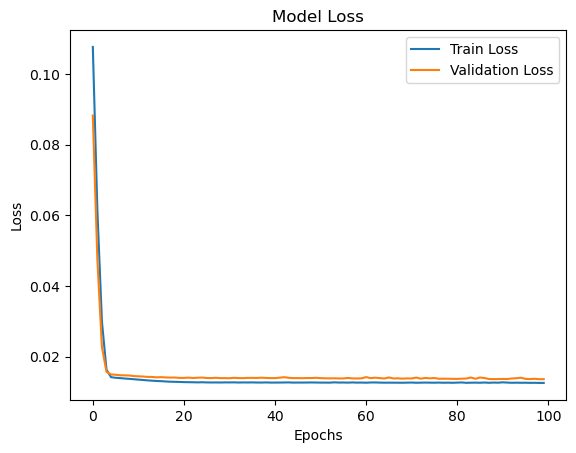

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [ ]:
# Starting with the last 'look_back' data points from your original dataset
input_seq = scaled_values[-look_back:]  # Reshape this as done for training

# Reshape input for the model
input_seq = input_seq.reshape((1, look_back, 1))

# Forecasting the next value
predicted_value_scaled = model.predict(input_seq)

# Inverse transform the scaled value if necessary
predicted_value = scaler.inverse_transform(predicted_value_scaled)

print("Predicted Value:", predicted_value)


1/1 [==============================] - 0s 25ms/step
Predicted Value: [[24.353533]]


In [ ]:
future_steps = 5  # Number of steps you want to forecast into the future
future_predictions = []

for _ in range(future_steps):
    # Predict the next value
    predicted_value_scaled = model.predict(input_seq)

    # Inverse scale and store the prediction
    predicted_value = scaler.inverse_transform(predicted_value_scaled)
    future_predictions.append(predicted_value[0][0])

    # Update the input sequence for the next prediction
    # Shift the sequence one step forward and append the new prediction
    input_seq = np.roll(input_seq, -1, axis=1)
    input_seq[0, -1, 0] = predicted_value_scaled[0, 0]

print("Future Predictions:", future_predictions)


1/1 [==============================] - 0s 23ms/step
Future Predictions: [24.353533, 26.114977, 27.19194, 27.859364, 28.276398]


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculating metrics for the training set
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)

# Calculating metrics for the testing set
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

# Print metrics
print("Training Data - MAE:", train_mae, ", MSE:", train_mse, ", RMSE:", train_rmse)
print("Testing Data - MAE:", test_mae, ", MSE:", test_mse, ", RMSE:", test_rmse)


14/14 [==============================] - 0s 2ms/step
Training Data - MAE: 0.08691549237829417 , MSE: 0.012723306630696438 , RMSE: 0.11279763574958669
Testing Data - MAE: 0.08294408516947087 , MSE: 0.011264103317947242 , RMSE: 0.10613248003296277


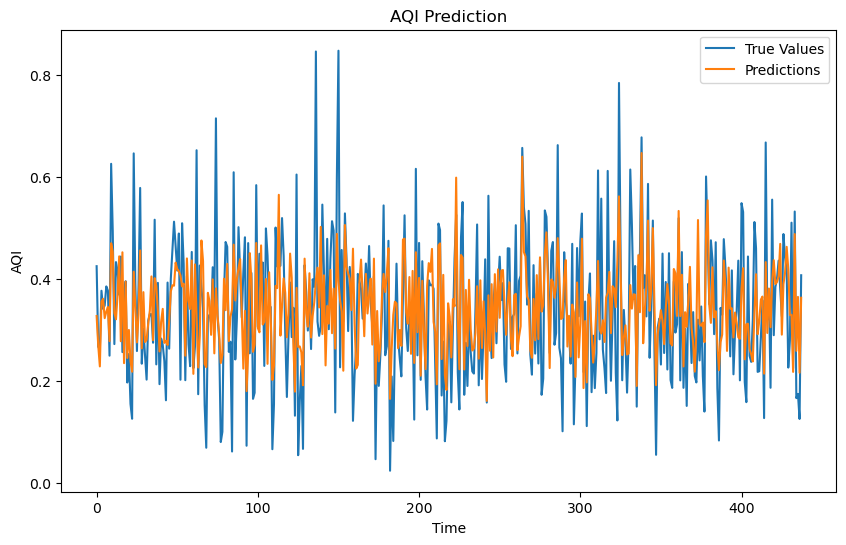

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(test_predictions, label='Predictions')
plt.title('AQI Prediction')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.show()


# HyperParameter Tuning

In [ ]:
    import numpy as np
    from sklearn.model_selection import train_test_split, KFold
    from sklearn.metrics import mean_squared_error
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from sklearn.preprocessing import MinMaxScaler

    # Assuming you have X_train and y_train
    # X_train = ...
    # y_train = ...

    # Reshape data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Define the model creation function
    def create_model(units, optimizer):
        model = Sequential()
        model.add(LSTM(units, activation='relu', input_shape=(X_train.shape[1], 1)))
        model.add(Dense(1))
        model.compile(optimizer=optimizer, loss='mean_squared_error')
        return model

    # Define the parameter grid
    param_grid = {
        'units': [50, 100],
        'optimizer': ['adam', 'rmsprop'],
        'batch_size': [32, 64],
        'epochs': [50, 100]
    }

    # Prepare for manual grid search
    best_score = float("inf")
    best_params = None

    for units in param_grid['units']:
        for optimizer in param_grid['optimizer']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    # Create model with current set of parameters
                    model = create_model(units=units, optimizer=optimizer)

                    # Train the model
                    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Evaluate the model
                    mse = model.evaluate(X_train, y_train, verbose=0)
                    print(f"Units: {units}, Optimizer: {optimizer}, Batch Size: {batch_size}, Epochs: {epochs}, MSE: {mse}")

                    # Update best score and parameters
                    if mse < best_score:
                        best_score = mse
                        best_params = {'units': units, 'optimizer': optimizer, 'batch_size': batch_size, 'epochs': epochs}

    # Print best parameters
    print("Best parameters:", best_params)


Units: 50, Optimizer: adam, Batch Size: 32, Epochs: 50, MSE: 0.01288304477930069
Units: 50, Optimizer: adam, Batch Size: 32, Epochs: 100, MSE: 0.012642859481275082
Units: 50, Optimizer: adam, Batch Size: 64, Epochs: 50, MSE: 0.01289966981858015
Units: 50, Optimizer: adam, Batch Size: 64, Epochs: 100, MSE: 0.012782773934304714
Units: 50, Optimizer: rmsprop, Batch Size: 32, Epochs: 50, MSE: 0.012803406454622746
Units: 50, Optimizer: rmsprop, Batch Size: 32, Epochs: 100, MSE: 0.012723096646368504
Units: 50, Optimizer: rmsprop, Batch Size: 64, Epochs: 50, MSE: 0.012822329998016357
Units: 50, Optimizer: rmsprop, Batch Size: 64, Epochs: 100, MSE: 0.012838178314268589
Units: 100, Optimizer: adam, Batch Size: 32, Epochs: 50, MSE: 0.01273310836404562
Units: 100, Optimizer: adam, Batch Size: 32, Epochs: 100, MSE: 0.012651477940380573
Units: 100, Optimizer: adam, Batch Size: 64, Epochs: 50, MSE: 0.012837695889174938
Units: 100, Optimizer: adam, Batch Size: 64, Epochs: 100, MSE: 0.0128207616508007

In [ ]:
# Rebuild the model using the best hyperparameters
best_model = create_model(units=best_params['units'], optimizer=best_params['optimizer'])

# Assuming you have a separate test set (X_test, y_test)
# X_test = ...
# y_test = ...
# Don't forget to reshape X_test if necessary

# Retrain the model
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)


Epoch 1/100
55/55 [==============================] - 1s 2ms/step - loss: 0.1080
Epoch 2/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0459
Epoch 3/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 5/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0145
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 7/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 8/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 9/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 10/100
55/55 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 11/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 12/100
55/55 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 13/100
55/55 [=================

In [ ]:
# Make predictions with the optimized model
optimized_predictions = best_model.predict(X_test)



14/14 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate predictions
optimized_mse = mean_squared_error(y_test, optimized_predictions)
optimized_rmse = np.sqrt(optimized_mse)

print("Optimized Model - MSE:", optimized_mse, "RMSE:", optimized_rmse)


Optimized Model - MSE: 0.011212906508738655 RMSE: 0.10589101240775184


# Future General Prediction

In [ ]:
from tensorflow.keras.models import load_model

# Assuming your trained model is still in memory as 'model'
# If it's saved in a file, load it:
# model = load_model('your_model_filename.h5')

# Prepare the most recent data point for prediction
most_recent_data = scaled_values[-1].reshape(1, -1)  # Reshape for scaler
scaled_input = scaler.transform(most_recent_data)    # Apply scaling
X_predict = scaled_input.reshape((1, look_back, 1))  # Reshape for LSTM

# Make the prediction
predicted_scaled = model.predict(X_predict)

# Inverse transform the prediction
predicted_aqi = scaler.inverse_transform(predicted_scaled)
print("Predicted Future AQI:", predicted_aqi[0][0])


1/1 [==============================] - 0s 204ms/step
Predicted Future AQI: 13.222866


# Future Predictions on each City

In [ ]:
from tensorflow.keras.models import load_model

# Load your trained LSTM model
# model = load_model('your_model_filename.h5')

# Assuming 'df' is your DataFrame with AQI data and a 'City' column
cities = df['City'].unique()
city_predictions = {}

for city in cities:
    # Extract the most recent data for this city
    city_data = df[df['City'] == city]['Overall_AQI_Avg'].tail(look_back).values.reshape(-1, 1)
    
    # Scale and reshape the data
    scaled_city_data = scaler.transform(city_data)
    X_city_predict = scaled_city_data.reshape((1, look_back, 1))

    # Make the prediction
    predicted_city_aqi_scaled = model.predict(X_city_predict)
    predicted_city_aqi = scaler.inverse_transform(predicted_city_aqi_scaled)

    # Store the prediction
    city_predictions[city] = predicted_city_aqi[0][0]

# Print the predicted AQI for each city
for city, prediction in city_predictions.items():
    print(f"Predicted AQI for {city}: {prediction}")


1/1 [==============================] - 0s 31ms/step
Predicted AQI for Ottawa Downtown: 22.85014533996582
Predicted AQI for Hamilton Downtown: 24.504638671875
Predicted AQI for Hamilton Mountain: 25.169164657592773
Predicted AQI for Toronto North: 23.725688934326172
Predicted AQI for Toronto West: 23.15027618408203
Predicted AQI for Windsor Downtown: 24.241397857666016
